# Figure 10: Experiment 3, Cardiac Spatial Phase ($\mu_{||\phi||}$, $\sigma_{||\phi||}$),
This notebook is used to recreate Figure 2, showing the temporal phase [$\mu_{||\phi||}$, $\sigma_{||\phi||}$] results for the neuroimaging data in Experiment 1. The data acquired has the following dimensions:
 1. X = 128
 2. Y = 100
 3. Slices = 3
 4. Diffusion directions [b=0 + $G_x$, $G_y$, $G_z$] = 4
 5. Repetitions = 5
 6. Mid-Systolic Timepoint = 1 Trigger Delay 
 
A user can selcet the volunteer, slice, and diffusion direction to then compute the spatial phase mean and standard deviation for a given grouping of images (Fig. 10A). The user can also select the slice and diffusion direction to plot the mean and standard deviation of spatial phase  for a given diffusion direction and slice (Fig. 10B). These are the same steps that are used to create Supplementary Figures. 

The last portion of the code shows heatmaps so a user can test signifiance between different different motion compensation levels and different slices. 

Contact for questions:\
Ariel Hannum\
ahannum@stanford.edu\
Stanford University

# Figure 10A: Spatial Phase maps ($\mu_{||\phi||}$ and $\sigma_{||\phi||}$)

In [1]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils_heart import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns


/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Heart' 

# Set colormaps for spatial phase mean and standard deviation 
colorA = sns.color_palette("mako",as_cmap = True) # A = mean
colorB = cm.lajolla_r # B = standard deviation 


/Users/arielhannum/Documents/GitHub/dwi_phase/Interactive_Figs/helper_phase_utils_heart.py:291: RuntimeWarning: Mean of empty slice
  mean_map = np.nanmean(spatial_map,axis = -1)
/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


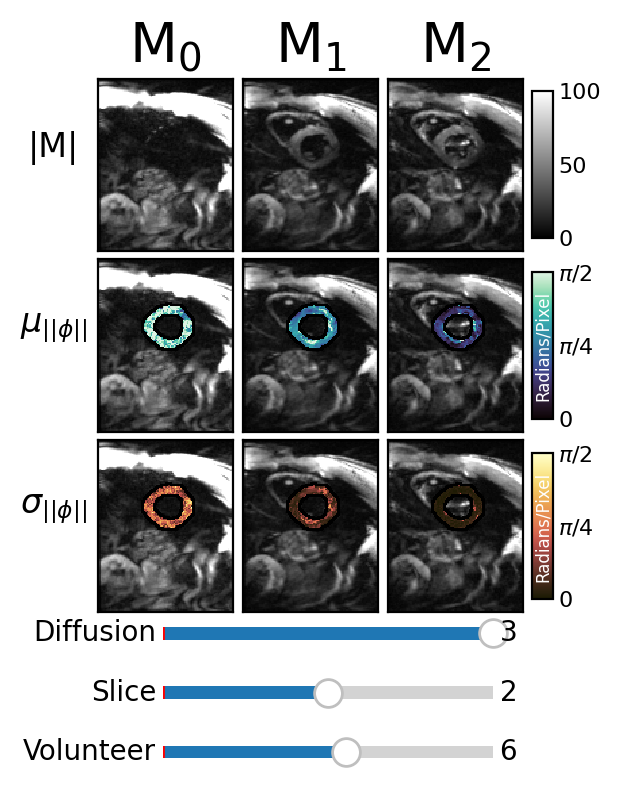

In [30]:
# Function to update the heatmap based on the slider value
def update_heatmap():
    for ii in range(3):
        image, std, mag  = load_spatial_map(directory, volunteer, ii,  slice, diffusion)
        mask_init = ~np.isnan(image)
        mask = np.where(mask_init, 1, image)
        for jj in range(3):
            ax[jj,ii].clear()
            ax[jj,ii].set_xticks([])
            ax[jj,ii].set_yticks([])
            im1 = ax[jj,ii].imshow(mag,vmin = 0,vmax = 100,cmap ='gray',alpha = 1,interpolation = 'nearest')
        
        
        im2 = ax[1,ii].imshow(image,vmin = 0,vmax = math.pi/2,cmap =colorA,alpha = 1,interpolation = 'nearest')
        im3 = ax[2,ii].imshow(std,vmin = 0,vmax = math.pi/2,cmap =colorB,alpha = 1,interpolation = 'nearest')
        ax[1,ii].imshow(get_edge(np.nan_to_num(mask)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
        ax[2,ii].imshow(get_edge(np.nan_to_num(mask)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')


    # Set titles and labels 
    ax[0,0].set_title('M$_0$',size = 20)
    ax[0,1].set_title('M$_1$',size = 20)
    ax[0,2].set_title('M$_2$',size = 20)

    ax[0, 0].set_ylabel('|M|',rotation = 0, labelpad=16,size = 12)
    ax[1, 0].set_ylabel('$\mu_{||\phi||}$',rotation = 0, labelpad=16,size = 12)
    ax[2, 0].set_ylabel('$\sigma_{||\phi||}$',rotation = 0, labelpad=16,size = 12)


    # Redraw the figure
    canvas.draw()

# Function to update figure based on diffusion direction
def change_val(val):
    global diffusion,slice,volunteer

    diffusion = int(slider_diff.val)
    slice = int(slider_slice.val)-1
    volunteer = int(slider_volunteer.val)

    update_heatmap()


# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(3, 3, figsize=(3,6), dpi = 200, sharey=True,sharex = True)
plt.subplots_adjust(bottom=0.25,wspace=0.001, hspace=0.05)


# Set titles and labels 
ax[0,0].set_title('M$_0$',size = 20)
ax[0,1].set_title('M$_1$',size = 20)
ax[0,2].set_title('M$_2$',size = 20)

for jj in range(2):
    for ii in range(3):
        ax[jj,ii].get_xaxis().set_ticks([])
        ax[jj,ii].get_yaxis().set_ticks([])


# Set up initial images
initial_volunteer = 1
volunteer = 1
slice = 0
diffusion = 0

for ii in range(3):
    image, std, mag  = load_spatial_map(directory, volunteer, ii,  slice, diffusion)
    mask_init = ~np.isnan(image)
    mask = np.where(mask_init, 1, image)
    
    for jj in range(3):
        ax[jj,ii].clear()
        ax[jj,ii].set_xticks([])
        ax[jj,ii].set_yticks([])
        im1 = ax[jj,ii].imshow(mag,vmin = 0,vmax = 100,cmap ='gray',alpha = 1,interpolation = 'nearest')
    
    im2 = ax[1,ii].imshow(image,vmin = 0,vmax = math.pi/2,cmap =colorA,alpha = 1,interpolation = 'nearest')
    im3 = ax[2,ii].imshow(std,vmin = 0,vmax = math.pi/2,cmap =colorB,alpha = 1,interpolation = 'nearest')
    ax[1,ii].imshow(get_edge(np.nan_to_num(mask)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
    ax[2,ii].imshow(get_edge(np.nan_to_num(mask)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
# Set titles and labels 
ax[0,0].set_title('M$_0$',size = 20)
ax[0,1].set_title('M$_1$',size = 20)
ax[0,2].set_title('M$_2$',size = 20)

ax[0, 0].set_ylabel('|M|',rotation = 0, labelpad=16,size = 12)
ax[1, 0].set_ylabel('$\mu_{||\phi||}$',rotation = 0, labelpad=16,size = 12)
ax[2, 0].set_ylabel('$\sigma_{||\phi||}$',rotation = 0, labelpad=16,size = 12)



# Create colorbars for each row
cbar1 = fig.colorbar(im1, ax=ax[0, :],fraction=0.045, pad=0.02,aspect = 7,ticks = [0,50,100])
cbar2 = fig.colorbar(im2, ax=ax[1, :],fraction=0.045, pad=0.02,aspect = 7,ticks = [0,math.pi/4,math.pi/2])
cbar3 = fig.colorbar(im3, ax=ax[2, :],fraction=0.045, pad=0.02,aspect = 7,ticks = [0,math.pi/4,math.pi/2])


label_text = 'Radians/Pixel'
cbar2.ax.text(0.5, 0.12, label_text, transform=cbar2.ax.transAxes,
    ha='center', va='bottom',rotation=90,color = 'white',size = 6)



label_text = 'Radians/Pixel'
cbar3.ax.text(0.5, 0.12, label_text, transform=cbar3.ax.transAxes,
    ha='center', va='bottom',rotation=90,color = 'white',size = 6)

#cbar3.ax.text(0.5, 0.3, label_text, transform=cbar2.ax.transAxes,
#    ha='center', va='bottom',rotation=90,color = 'white',size = 8)
cbar1.ax.yaxis.set_tick_params(pad=2)
cbar1.ax.tick_params(size=0)
cbar2.ax.yaxis.set_tick_params(pad=2)
cbar2.ax.tick_params(size=0)
cbar3.ax.yaxis.set_tick_params(pad=2)
cbar3.ax.tick_params(size=0)

cbar1.ax.set_yticklabels([0,50,100],size =8, rotation = 0) 
cbar2.ax.set_yticklabels(['0', '$\pi/4$', '$\pi/2$'],size =8, rotation = 0) 
cbar3.ax.set_yticklabels(['0', '$\pi/4$', '$\pi/2$'],size =8, rotation = 0) 

# Create a slider for the timepoints
slider_ax_diff = plt.axes([0.25, 0.21, 0.55, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Create a slider for the slices
slider_ax_slice = plt.axes([0.25, 0.14, 0.55, 0.03], facecolor='lightgray')
slider_slice = Slider(slider_ax_slice, 'Slice', 1, 3, valinit=0, valstep=1)

# Create a slider for the volunteer 
slider_ax_volunteer = plt.axes([0.25, 0.07, 0.55, 0.03], facecolor='lightgray')
slider_volunteer = Slider(slider_ax_volunteer, 'Volunteer', 1, 10, valinit=0, valstep=1)


# Attach the update_heatmap function to the slider's on_changed event
slider_diff.on_changed(change_val)
slider_slice.on_changed(change_val)
slider_volunteer.on_changed(change_val)


# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()


# Start the Tkinter event loop
window.mainloop()



# Figure 10B: Spatial Phase for all volunteers ($\mu_{||\phi||}$ and $\sigma_{||\phi||}$)

In [31]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils_heart import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns


In [32]:
# Set background style of plots
sns.set(style='darkgrid', palette='Set2')
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Heart' 



In [16]:
# List the index of volunteers you want to see plotted 
list_vols = [1,2,3,4,5,6,7,8,9,10]
# Load and Compute the net mean and standard deviation of the temporal phase variation (this can take up to 2 minutes)
m0_mean, m0_std = get_spatialPhs_mean_std(directory,list_vols,0)
m1_mean,m1_std = get_spatialPhs_mean_std(directory,list_vols,1)
m2_mean,m2_std = get_spatialPhs_mean_std(directory,list_vols,2)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])